<a href="https://colab.research.google.com/github/salmaahmed2828/NADI-2024/blob/main/Arabic_Dialect_Identification_subtask1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import re
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

In [ ]:
ds1=pd.read_csv('/content/NADI2020-TWT.tsv',sep='\t')
ds1.head()

,#1_tweet_ID,#2_tweet_content,#3_country_label,#4_province_label
0,TRAIN_1,الفار العور يشوف فقط كيسي ومايشوف ماتويد,Iraq,iq_Al-Anbar
1,TRAIN_2,ي دينيييي ربنا يستر,Egypt,eg_Alexandria
2,TRAIN_3,أساساً نسبكم قذر ونجس بلاش تتفاخروا بنجاستكم ي...,Iraq,iq_Maysan
3,TRAIN_4,ليْسَت كُل المَشَاعِرِ تَحْتَاجُ إلى حَبِيب بَ...,Morocco,ma_Oriental
4,TRAIN_5,لأ ني حاضرها هذي لايف,Libya,ly_Al-Jabal-al-Akhdar


In [ ]:
ds1.drop(['#1_tweet_ID','#4_province_label'],axis=1,inplace=True)
ds1=ds1.rename(columns={ '#2_tweet_content' : '#2_content'})
ds1.head()

,#2_content,#3_country_label
0,الفار العور يشوف فقط كيسي ومايشوف ماتويد,Iraq
1,ي دينيييي ربنا يستر,Egypt
2,أساساً نسبكم قذر ونجس بلاش تتفاخروا بنجاستكم ي...,Iraq
3,ليْسَت كُل المَشَاعِرِ تَحْتَاجُ إلى حَبِيب بَ...,Morocco
4,لأ ني حاضرها هذي لايف,Libya


In [ ]:
ds2=pd.read_csv('/content/NADI2021-TWT.tsv',sep='\t')
ds2.head()

,#1_tweet_ID,#2_tweet_content,#3_country_label,#4_province_label
0,TRAIN_0,حاجة حلوة اكيد,Egypt,eg_Faiyum
1,TRAIN_1,عم بشتغلوا للشعب الاميركي اما نحن يكذبوا ويغشو...,Iraq,iq_Dihok
2,TRAIN_2,ابشر طال عمرك,Saudi_Arabia,sa_Ha'il
3,TRAIN_4,شهرين وتروح والباقي غير صيف ملينا,Algeria,dz_El-Oued
4,TRAIN_5,يابنتى والله ما حد متغاظ ولا مفروس منك ولا بيح...,Syria,sy_Damascus-City


In [ ]:
ds2.drop(['#1_tweet_ID','#4_province_label'],axis=1,inplace=True)
ds2=ds2.rename(columns={ '#2_tweet_content' : '#2_content'})
ds2.head()

,#2_content,#3_country_label
0,حاجة حلوة اكيد,Egypt
1,عم بشتغلوا للشعب الاميركي اما نحن يكذبوا ويغشو...,Iraq
2,ابشر طال عمرك,Saudi_Arabia
3,شهرين وتروح والباقي غير صيف ملينا,Algeria
4,يابنتى والله ما حد متغاظ ولا مفروس منك ولا بيح...,Syria


In [ ]:
ds3=pd.read_csv('/content/NADI2023_TWT.tsv',sep='\t')
ds3.head()

,#1_id,#2_content,#3_country_label
0,subtask1_train_1,USER روتلج علمود جنسيه,Iraq
1,subtask1_train_2,النت في عمان يذكرني ببطاقه الافق مال NUM ريالا...,Oman
2,subtask1_train_3,USER انا كنصراوي لاالوم اخواني النصراويه بتشجي...,Saudi_Arabia
3,subtask1_train_4,دوله اسرائيل قائمه علي ضعفنا يوم ما نتوحد ونقو...,Palestine
4,subtask1_train_5,USER لو تقابلنا بعد طول الغياب ضمني ما فيني حي...,Bahrain


In [ ]:
ds3.drop(['#1_id'],axis=1,inplace=True)
ds3.head()

,#2_content,#3_country_label
0,USER روتلج علمود جنسيه,Iraq
1,النت في عمان يذكرني ببطاقه الافق مال NUM ريالا...,Oman
2,USER انا كنصراوي لاالوم اخواني النصراويه بتشجي...,Saudi_Arabia
3,دوله اسرائيل قائمه علي ضعفنا يوم ما نتوحد ونقو...,Palestine
4,USER لو تقابلنا بعد طول الغياب ضمني ما فيني حي...,Bahrain


In [ ]:
ds1.shape

(20370, 2)

In [ ]:
ds2.shape

(20398, 2)

In [ ]:
ds3.shape

(18000, 2)

In [ ]:
data=pd.concat([ds1,ds2,ds3], ignore_index=True)
data.head()

,#2_content,#3_country_label
0,الفار العور يشوف فقط كيسي ومايشوف ماتويد,Iraq
1,ي دينيييي ربنا يستر,Egypt
2,أساساً نسبكم قذر ونجس بلاش تتفاخروا بنجاستكم ي...,Iraq
3,ليْسَت كُل المَشَاعِرِ تَحْتَاجُ إلى حَبِيب بَ...,Morocco
4,لأ ني حاضرها هذي لايف,Libya


In [ ]:
data.shape

(58768, 2)

In [ ]:
print("Number of duplicated rows: ",data.duplicated().sum())

Number of duplicated rows:  303


In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
print("Number of duplicated rows: ",data.duplicated().sum())

Number of duplicated rows:  0


In [ ]:
data.isnull().sum().sort_values(ascending=False).head()

#2_content          0
#3_country_label    0
dtype: int64

In [ ]:
def clean_content(content):
  return re.sub("[a-zA-Z0-9]","",content)

In [ ]:
data["clean_content"]=data["#2_content"].apply(clean_content)
data.head()

,#2_content,#3_country_label,clean_content
0,الفار العور يشوف فقط كيسي ومايشوف ماتويد,Iraq,الفار العور يشوف فقط كيسي ومايشوف ماتويد
1,ي دينيييي ربنا يستر,Egypt,ي دينيييي ربنا يستر
2,أساساً نسبكم قذر ونجس بلاش تتفاخروا بنجاستكم ي...,Iraq,أساساً نسبكم قذر ونجس بلاش تتفاخروا بنجاستكم ي...
3,ليْسَت كُل المَشَاعِرِ تَحْتَاجُ إلى حَبِيب بَ...,Morocco,ليْسَت كُل المَشَاعِرِ تَحْتَاجُ إلى حَبِيب بَ...
4,لأ ني حاضرها هذي لايف,Libya,لأ ني حاضرها هذي لايف


In [ ]:
def normalize_arabic(content):
    content = re.sub("[إأآا]", "ا", content)
    content = re.sub("ى", "ي", content)
    content = re.sub("ؤ", "ء", content)
    content = re.sub("ئ", "ء", content)
    content = re.sub("ة", "ه", content)
    content = re.sub("گ", "ك", content)
    return content

In [ ]:
data["clean_content"]=data["clean_content"].apply(normalize_arabic)
data.head()

,#2_content,#3_country_label,clean_content
0,الفار العور يشوف فقط كيسي ومايشوف ماتويد,Iraq,الفار العور يشوف فقط كيسي ومايشوف ماتويد
1,ي دينيييي ربنا يستر,Egypt,ي دينيييي ربنا يستر
2,أساساً نسبكم قذر ونجس بلاش تتفاخروا بنجاستكم ي...,Iraq,اساساً نسبكم قذر ونجس بلاش تتفاخروا بنجاستكم ي...
3,ليْسَت كُل المَشَاعِرِ تَحْتَاجُ إلى حَبِيب بَ...,Morocco,ليْسَت كُل المَشَاعِرِ تَحْتَاجُ الي حَبِيب بَ...
4,لأ ني حاضرها هذي لايف,Libya,لا ني حاضرها هذي لايف


In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
arabic_stopwords = ['إذ', 'إذا', 'إذما', 'إذن', 'أف', 'أقل', 'أكثر', 'ألا', 'إلا', 'التي', 'الذي', 'الذين', 'اللاتي', 'اللائي', 'اللتان', 'اللتيا', 'اللتين', 'اللذان', 'اللذين', 'اللواتي', 'إلى', 'إليك', 'إليكم', 'إليكما', 'إليكن', 'أم', 'أما', 'أما', 'إما', 'أن', 'إن', 'إنا', 'أنا', 'أنت', 'أنتم', 'أنتما', 'أنتن', 'إنما', 'إنه', 'أنى', 'أنى', 'آه', 'آها', 'أو', 'أولاء', 'أولئك', 'أوه', 'آي', 'أي', 'أيها', 'إي', 'أين', 'أين', 'أينما', 'إيه', 'بخ', 'بس', 'بعد', 'بعض', 'بك', 'بكم', 'بكم', 'بكما', 'بكن', 'بل', 'بلى', 'بما', 'بماذا', 'بمن', 'بنا', 'به', 'بها', 'بهم', 'بهما', 'بهن', 'بي', 'بين', 'بيد', 'تلك', 'تلكم', 'تلكما', 'ته', 'تي', 'تين', 'تينك', 'ثم', 'ثمة', 'حاشا', 'حبذا', 'حتى', 'حيث', 'حيثما', 'حين', 'خلا', 'دون', 'ذا', 'ذات', 'ذاك', 'ذان', 'ذانك', 'ذلك', 'ذلكم', 'ذلكما', 'ذلكن', 'ذه', 'ذو', 'ذوا', 'ذواتا', 'ذواتي', 'ذي', 'ذين', 'ذينك', 'ريث', 'سوف', 'سوى', 'شتان', 'عدا', 'عسى', 'عل', 'على', 'عليك', 'عليه', 'عما', 'عن', 'عند', 'غير', 'فإذا', 'فإن', 'فلا', 'فمن', 'في', 'فيم', 'فيما', 'فيه', 'فيها', 'قد', 'كأن', 'كأنما', 'كأي', 'كأين', 'كذا', 'كذلك', 'كل', 'كلا', 'كلاهما', 'كلتا', 'كلما', 'كليكما', 'كليهما', 'كم', 'كم', 'كما', 'كي', 'كيت', 'كيف', 'كيفما', 'لا', 'لاسيما', 'لدى', 'لست', 'لستم', 'لستما', 'لستن', 'لسن', 'لسنا', 'لعل', 'لك', 'لكم', 'لكما', 'لكن', 'لكنما', 'لكي', 'لكيلا', 'لم', 'لما', 'لن', 'لنا', 'له', 'لها', 'لهم', 'لهما', 'لهن', 'لو', 'لولا', 'لوما', 'لي', 'لئن', 'ليت', 'ليس', 'ليسا', 'ليست', 'ليستا', 'ليسوا', 'ما', 'ماذا', 'متى', 'مذ', 'مع', 'مما', 'ممن', 'من', 'منه', 'منها', 'منذ', 'مه', 'مهما', 'نحن', 'نحو', 'نعم', 'ها', 'هاتان', 'هاته', 'هاتي', 'هاتين', 'هاك', 'هاهنا', 'هذا', 'هذان', 'هذه', 'هذي', 'هذين', 'هكذا', 'هل', 'هلا', 'هم', 'هما', 'هن', 'هنا', 'هناك', 'هنالك', 'هو', 'هؤلاء', 'هي', 'هيا', 'هيت', 'هيهات', 'وإذ', 'وإذا', 'وإن', 'وإنما', 'وبين', 'وجد', 'وقبل', 'وقد', 'وكان', 'وكانت', 'ولا', 'ولكن', 'ولو', 'ومن', 'وهو', 'يا']
def remove_stopwords_explicit(text):
    words = word_tokenize(text)
    filtered_words = [word for word in words if word not in arabic_stopwords]
    return ' '.join(filtered_words)
data["clean_content"]=data["clean_content"].apply(remove_stopwords_explicit)
data.head()
#print(remove_stopwords_explicit("مرحبا بالعالم. هذا مثال على كيفية إزالة الكلمات الوقفية من النص العربي."))


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,#2_content,#3_country_label,clean_content
0,الفار العور يشوف فقط كيسي ومايشوف ماتويد,Iraq,الفار العور يشوف فقط كيسي ومايشوف ماتويد
1,ي دينيييي ربنا يستر,Egypt,ي دينيييي ربنا يستر
2,أساساً نسبكم قذر ونجس بلاش تتفاخروا بنجاستكم ي...,Iraq,اساساً نسبكم قذر ونجس بلاش تتفاخروا بنجاستكم و...
3,ليْسَت كُل المَشَاعِرِ تَحْتَاجُ إلى حَبِيب بَ...,Morocco,ليْسَت كُل المَشَاعِرِ تَحْتَاجُ الي حَبِيب بَ...
4,لأ ني حاضرها هذي لايف,Libya,ني حاضرها لايف


In [ ]:
data['#3_country_label'].value_counts()

#3_country_label
Egypt           9719
Iraq            6238
Saudi_Arabia    5444
Algeria         4242
Oman            3587
Libya           3346
Syria           3327
Morocco         2908
UAE             2710
Tunisia         2606
Yemen           2276
Lebanon         2263
Jordan          1849
Palestine       1842
Kuwait          1835
Qatar           1446
Sudan           1421
Bahrain         1406
Name: count, dtype: int64

In [ ]:
country_name=data['#3_country_label'].unique()
temp_country_freq=data['#3_country_label'].value_counts()
country_freq=[]
for i in country_name:
  country_freq.append(temp_country_freq[i])

In [ ]:
country_name

array(['Iraq', 'Egypt', 'Morocco', 'Libya', 'UAE', 'Saudi_Arabia',
       'Bahrain', 'Syria', 'Lebanon', 'Oman', 'Palestine', 'Algeria',
       'Jordan', 'Tunisia', 'Kuwait', 'Yemen', 'Sudan', 'Qatar'],
      dtype=object)

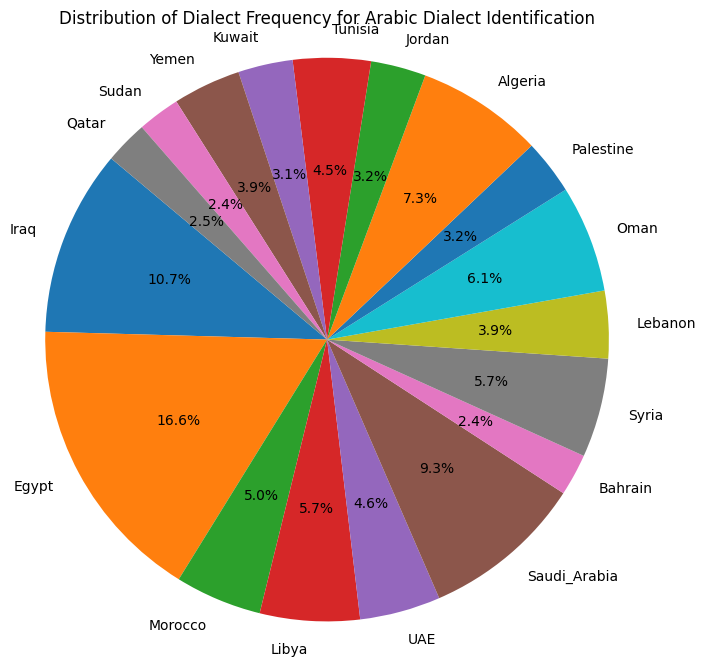

In [ ]:
# Creating the pie chart with labels including frequencies
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
plt.pie(country_freq, labels=[f"{country}"  for country in country_name], autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Dialect Frequency for Arabic Dialect Identification')

plt.show()

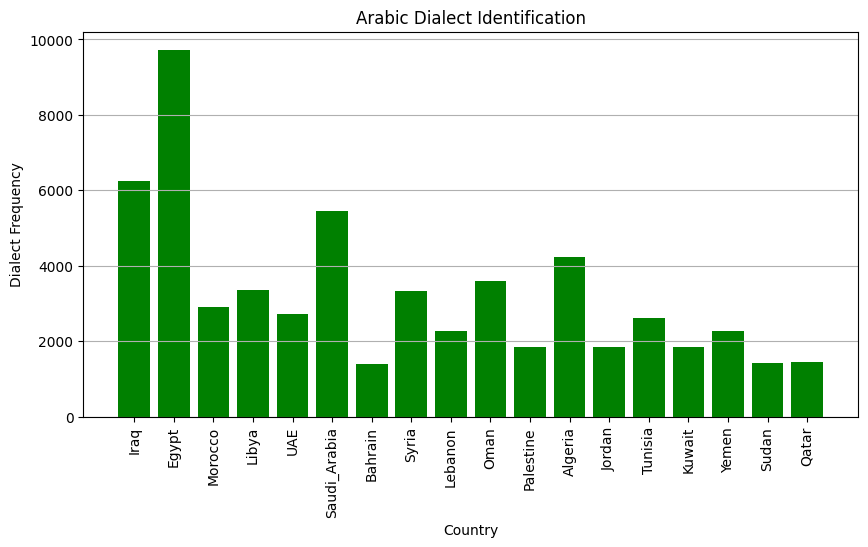

In [ ]:
# Creating the bar plot
plt.figure(figsize=(10, 5))
plt.bar(country_name, country_freq, color='green')
plt.xlabel('Country')
plt.ylabel('Dialect Frequency')
plt.title('Arabic Dialect Identification')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

In [ ]:
data['country_id'] = data['#3_country_label'].factorize()[0]

In [ ]:
x=data['clean_content']
y=data['#3_country_label']


In [ ]:
print(y.value_counts())

#3_country_label
Egypt           9719
Iraq            6238
Saudi_Arabia    5444
Algeria         4242
Oman            3587
Libya           3346
Syria           3327
Morocco         2908
UAE             2710
Tunisia         2606
Yemen           2276
Lebanon         2263
Jordan          1849
Palestine       1842
Kuwait          1835
Qatar           1446
Sudan           1421
Bahrain         1406
Name: count, dtype: int64


In [ ]:
y=pd.DataFrame(y)

print(y)

      #3_country_label
0                 Iraq
1                Egypt
2                 Iraq
3              Morocco
4                Libya
...                ...
58763             Iraq
58764          Algeria
58765             Iraq
58766            Egypt
58767           Kuwait

[58465 rows x 1 columns]


In [ ]:
from pickle import TRUE
import pandas as pd
test=pd.read_csv("/content/NADI2024_subtask1_dev2.tsv",sep='\t')
test.shape
x_test=test['sentence']




In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer();
x_ifidf=vectorizer.fit_transform(x)

x_ifidf.shape

(58465, 129727)

In [ ]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()
clf.fit(x_ifidf,y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
x_ifidf=pd.DataFrame(x_ifidf)
print(x_ifidf)

                                                       0
0        (0, 85382)\t0.4319532796334328\n  (0, 115713...
1        (0, 123567)\t0.5044580153058777\n  (0, 56059...
2        (0, 117422)\t0.3716666215610825\n  (0, 36746...
3        (0, 98660)\t0.23527302071824133\n  (0, 10998...
4        (0, 79029)\t0.554766971176112\n  (0, 49417)\...
...                                                  ...
58460    (0, 40720)\t0.38866627855226027\n  (0, 59500...
58461    (0, 17159)\t0.18151233067816525\n  (0, 11839...
58462    (0, 85372)\t0.27332495744382573\n  (0, 10369...
58463    (0, 33231)\t0.5368493784745136\n  (0, 9818)\...
58464    (0, 61531)\t0.4513436844766374\n  (0, 123599...

[58465 rows x 1 columns]


In [ ]:
from sklearn.pipeline import Pipeline
steps=[('tfidf', TfidfVectorizer()),('clf', LogisticRegression(n_jobs=1,C=1e5))]
text_clf = Pipeline(steps)
text_clf.fit(x, y)


predictions = text_clf.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
countries=['Algeria','Egypt','Jordan','Palestine','Sudan','Syria','Tunisia','Yemen']
final=[]
for i in range(len(test)):
  temp=[]
  for j in range(8):
      k=test.iloc[i,j]
      if k=='n':
        temp.append(countries[j])
  final.append(temp)


In [ ]:
final

[['Egypt', 'Jordan', 'Palestine', 'Sudan', 'Syria', 'Tunisia', 'Yemen'],
 ['Egypt', 'Jordan', 'Palestine', 'Sudan', 'Syria', 'Tunisia'],
 [],
 ['Egypt', 'Jordan', 'Palestine', 'Sudan', 'Syria', 'Tunisia', 'Yemen'],
 ['Egypt', 'Palestine', 'Syria', 'Tunisia', 'Yemen'],
 ['Jordan', 'Palestine', 'Sudan', 'Syria', 'Tunisia'],
 [],
 ['Jordan', 'Palestine', 'Sudan', 'Tunisia', 'Yemen'],
 ['Egypt', 'Palestine', 'Syria', 'Tunisia', 'Yemen'],
 ['Jordan', 'Palestine', 'Sudan', 'Syria', 'Tunisia', 'Yemen'],
 ['Egypt', 'Jordan', 'Syria', 'Yemen'],
 ['Jordan', 'Palestine', 'Sudan', 'Syria', 'Tunisia', 'Yemen'],
 [],
 ['Jordan', 'Palestine', 'Syria', 'Tunisia', 'Yemen'],
 ['Yemen'],
 ['Egypt', 'Palestine', 'Sudan', 'Tunisia', 'Yemen'],
 ['Jordan', 'Palestine', 'Sudan', 'Syria', 'Tunisia'],
 ['Egypt', 'Jordan'],
 ['Jordan', 'Palestine', 'Syria', 'Tunisia', 'Yemen'],
 ['Egypt', 'Palestine', 'Sudan', 'Syria', 'Tunisia', 'Yemen'],
 ['Egypt', 'Jordan', 'Yemen'],
 ['Egypt', 'Jordan', 'Palestine', 'Syria',

In [ ]:
tp=0
for idx in range(len(predictions)):
  if predictions[idx] not in final[idx]:
    tp=tp+1
print(tp)

85


In [ ]:
acc=tp/len(test)
print('accuracy:',acc)

accuracy: 0.7083333333333334


In [ ]:
ans=[]
for i in predictions:
  temp=[]
  for country in country_name:
    if i==country:
      temp.append(1)
    else:
      temp.append(0)
  ans.append(temp)


In [ ]:

print(ans)

[[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [ ]:
import csv
file_path = r'C:\Users\dell\OneDrive\Desktop\Datasets\output.csv'
with open(file_path, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(ans)